In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# !git clone https://www.github.com/yohanesnuwara/computational-geophysics


## Data Upload

### Upload Complete Bouguer Anomaly data

In [4]:
data = np.loadtxt('/content/Gravity_UTM.txt')
utm_x = np.array(data[:,0])
utm_y = np.array(data[:,1])
CBA = np.array(data[:,2])

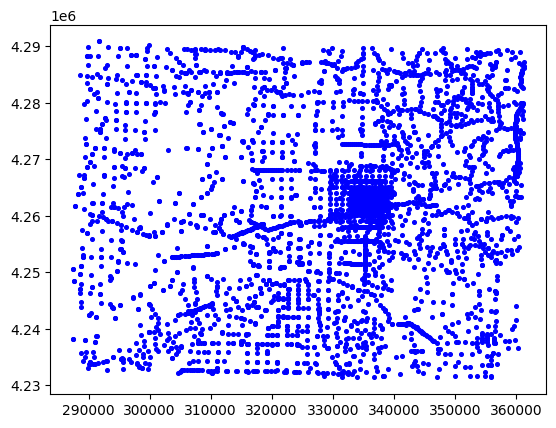

In [5]:
plt.scatter(utm_x, utm_y, s=7, color='blue')

### Plot Complete Bouguer Anomaly data

Below is a plot of interpolated CBA, white dots are the stations, and black dots are the gridded coordinate

Text(0.5, 1.0, 'Grid sparseness: 50')

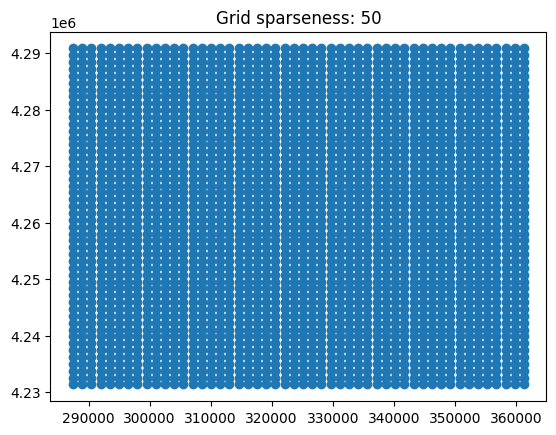

In [6]:
import scipy
from scipy.interpolate import griddata

sparseness = 50

# Gridding
xi = np.linspace(min(utm_x), max(utm_x), sparseness)
yi = np.linspace(min(utm_y), max(utm_y), sparseness)
xi, yi = np.meshgrid(xi, yi)

plt.scatter(xi, yi)
plt.title(f'Grid sparseness: {sparseness}')

In [7]:
# Interpolation
zi = griddata((utm_x,utm_y),CBA,(xi,yi),method='cubic')

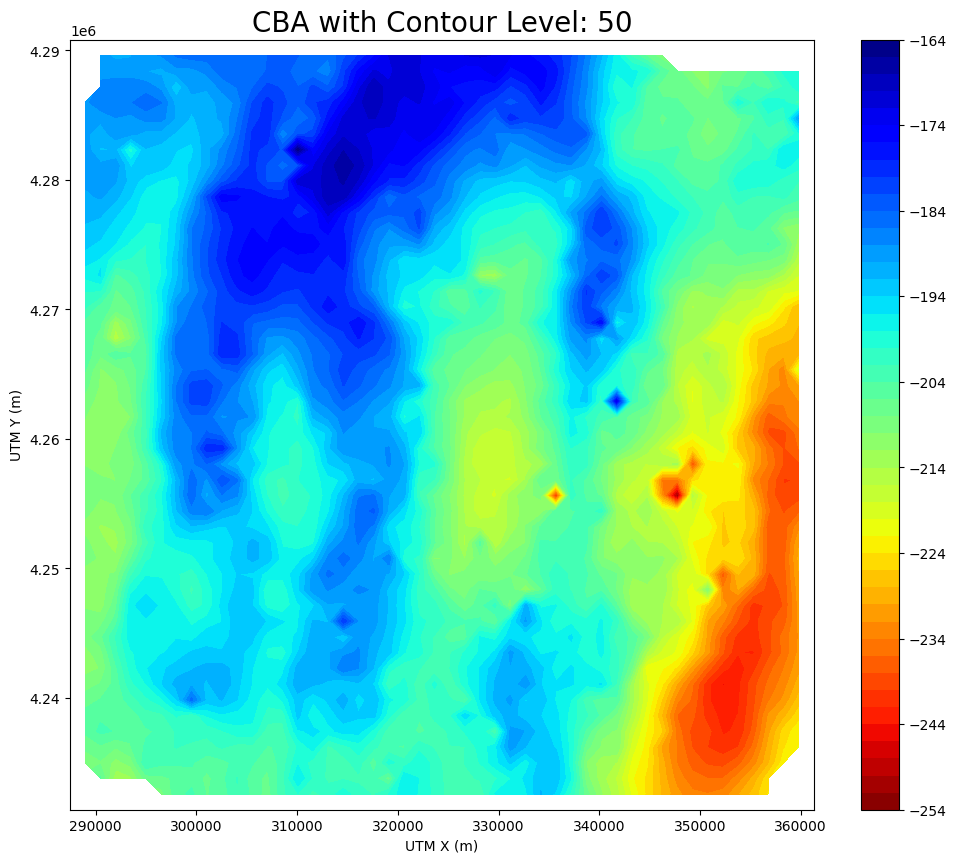

In [8]:
fig, ax = plt.subplots(figsize=(12,10))

cnt_level = 50

# plot CBA contours
im = ax.contourf(xi,yi,zi,levels=cnt_level, cmap="jet_r")
ax.set_title(f'CBA with Contour Level: {cnt_level}', fontsize=20)
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

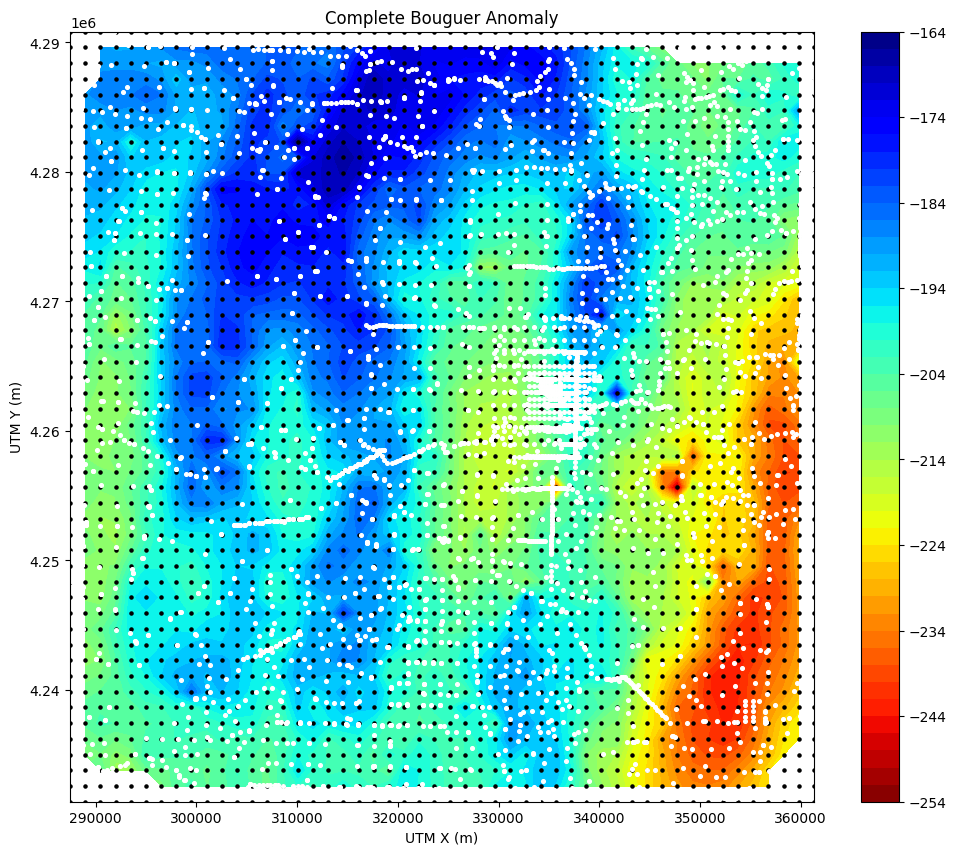

In [9]:


fig, ax = plt.subplots(figsize=(12,10))

# plot CBA contours
im = ax.contourf(xi,yi,zi,levels=50, cmap="jet_r")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
fig.colorbar(im)

im = plt.scatter(xi, yi, s=5, color='black')

# plot stations WITH STATION NUMBERS, started from 0
n = np.arange(0,len(utm_x), 1)
ax.scatter(utm_x, utm_y, s=7, color='white')

# for i, txt in enumerate(n):
#     ax.annotate(txt, (utm_x[i], utm_y[i]), size=12)

Print the gridded x coordinate, y coordinate, and the bouguer anomaly

In [10]:
# print("Dimension of X gridding:", xi.shape, "\n")
# print("Dimension of Y gridding:", yi.shape, "\n")
# print("Dimension of Z gridding:", zi.shape, "\n")
# print ("X gridding: ", xi, "\n")
# print ("Y gridding: ", yi, "\n")
# print ("CBA gridding: ", zi)

## Concept of Computing Derivatives in 2D (Synthetic Data)

Consider a synthetic data. After re-gridding using `griddata` and `np.meshgrid`, the structure of the data will be as follows

In [ ]:
coordx = np.array([[1,2,3,4,5], [1,2,3,4,5], [1,2,3,4,5], [1,2,3,4,5], [1,2,3,4,5]])
coordy = np.array([[1,1,1,1,1], [2,2,2,2,2], [3,3,3,3,3], [4,4,4,4,4], [5,5,5,5,5]])
bouguer = np.array([[10,22,34,46,58], [24,26,28,22,24], [34,26,42,54,38], [40,42,44,46,48], [51,53,55,57,59]])
print("Shape of X coordinate after gridding:", coordx.shape)
print("Shape of Y coordinate after gridding:", coordy.shape)
print("Shape of Bouguer after gridding:", bouguer.shape)

Shape of X coordinate after gridding: (5, 5)
Shape of Y coordinate after gridding: (5, 5)
Shape of Bouguer after gridding: (5, 5)


The shape is in matrix. If we plot these points

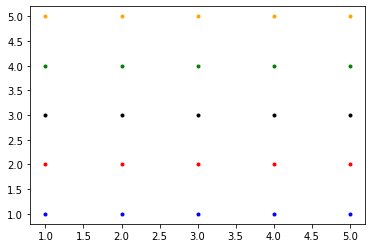

In [ ]:
plt.plot(coordx[0], coordy[0], '.', color='blue')
plt.plot(coordx[1], coordy[1], '.', color='red')
plt.plot(coordx[2], coordy[2], '.', color='black')
plt.plot(coordx[3], coordy[3], '.', color='green')
plt.plot(coordx[4], coordy[4], '.', color='orange')

And plot the synthetic Bouguer

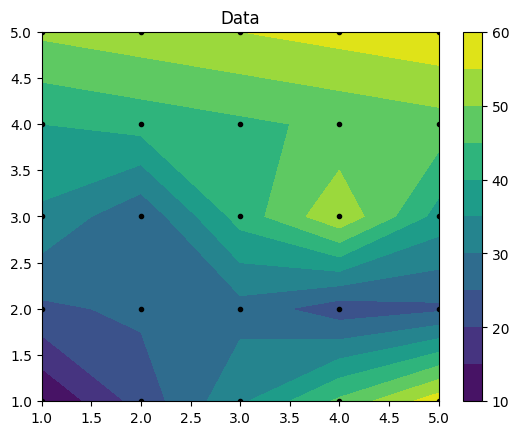

In [ ]:
im = plt.contourf(coordx, coordy, bouguer, levels=10)

for i in range(0,5):
  plt.plot(coordx[i], coordy[i], '.', color='black')

plt.title('Data')
plt.colorbar()

The following figure tells how to calculate derivative in X and Y direction in this 2D matrix

<div>
<img src="https://user-images.githubusercontent.com/51282928/77335411-af128e80-6d58-11ea-8e40-b085e754b9bf.jpeg" width="500"/>
</div>

In the looping process, the formula of calculating derivative are then:

$$\frac{dz}{dx}=\frac{z[i+1][j+1]-z[i][j]}{x[i+1][j+1]-x[i][j]}$$

$$\frac{dz}{dy}=\frac{z[i][j]-z[i+1][j]}{x[i][j]-x[i+1][j]}$$

In [ ]:
derivative_x = []
for i in range(0,(len(coordx)-1)):
  for j in range(0,(len(coordx)-1)):
    der = (bouguer[i+1][j+1]-bouguer[i][j])/(coordx[i+1][j+1]-coordx[i][j])
    derivative_x.append(float(der))

derivative_y = []
for i in range(0,(len(coordy)-1)):
  for j in range(0,(len(coordy)-1)):
    der = (bouguer[i][j]-bouguer[i+1][j])/(coordy[i][j]-coordy[i+1][j])
    derivative_y.append(float(der))

# total of both derivatives
derivative_total = np.array(derivative_x) + np.array(derivative_y)

After the calculation of derivatives, the length of elements (originally `5 x 5 = 25` will be reduced by 1, becomes `4 x 4 = 16`). The shape of derivatives is also changed (flattened) into a single array `1 x 16`. Thus, it must be reshaped into matrix form.

In [ ]:
g_der = np.reshape(derivative_total, ((len(coordx)-1), (len(coordx)-1)))
print('Shape of derivative matrix after reshaping:', g_der.shape)

Shape of derivative matrix after reshaping: (4, 4)


Differential/derivative is numerically taken as a midpoint between $x_1$ and $x_2$, therefore after derivative, the X and Y coordinates are now reduced to a midpoint, illustrated below. The blue stars are the midpoints.

<div>
<img src="https://user-images.githubusercontent.com/51282928/77337874-1c73ee80-6d5c-11ea-92c8-b5a67bc17dc2.png" width="300"/><img src="https://user-images.githubusercontent.com/51282928/77340690-40d1ca00-6d60-11ea-8b9b-7532d3219ff5.jpeg" width="500"/>
</div>

We compute for the midpoint for X and Y coordinates.

In [ ]:
xnew = []
for i in range(0,(len(coordx)-1)):
    for j in range (0,(len(coordx)-1)):
      xd=(coordx[i+1][j+1]-coordx[i][j]) * 0.5
      xnew.append(float(xd))

ynew = []
for i in range(0,(len(coordy)-1)):
    for j in range (0,(len(coordy)-1)):
      yd=(coordy[i+1][j+1]-coordy[i][j]) * 0.5
      ynew.append(float(yd))

print("Midpoints of X coordinates:", xnew)
print("Midpoints of Y coordinates:", ynew)

Midpoints of X coordinates: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Midpoints of Y coordinates: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


Then reshape both midpoints like we did before, into `4 x 4` matrix

In [ ]:
coordx_mid = np.reshape(xnew, ((len(coordx)-1), (len(coordx)-1)))
coordy_mid = np.reshape(ynew, ((len(coordy)-1), (len(coordy)-1)))
print('Shape of midpoints matrix after reshaping:', coordx_mid.shape)

Shape of midpoints matrix after reshaping: (4, 4)


However the computed midpoints are not from the origin `(0,0)`, it should be `(1.5, 2.5, 3.5, 4.5)` (see Figure above), thus we need to add `(0.5, 0.5, 0.5, 0.5, 0.5)` to the original X and Y coordinates `(1, 2, 3, 4, 5)`, omitting the last element `5`

In [ ]:
addx = coordx[:-1,:-1]
addy = coordy[:-1,:-1]

coordx_der = coordx_mid + addx
coordy_der = coordy_mid + addy
print("The new coordinate X after midpoint:", coordx_der)
print("The new coordinate Y after midpoint:", coordy_der)

The new coordinate X after midpoint: [[1.5 2.5 3.5 4.5]
 [1.5 2.5 3.5 4.5]
 [1.5 2.5 3.5 4.5]
 [1.5 2.5 3.5 4.5]]
The new coordinate Y after midpoint: [[1.5 1.5 1.5 1.5]
 [2.5 2.5 2.5 2.5]
 [3.5 3.5 3.5 3.5]
 [4.5 4.5 4.5 4.5]]


Finally, plotting.

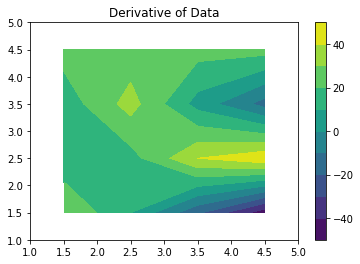

In [ ]:
im = plt.contourf(coordx_der, coordy_der, g_der, levels=10)
plt.title('Derivative of Data')
plt.xlim(1, 5); plt.ylim(1, 5)
plt.colorbar(im)

## First Derivative of CBA to X

In [11]:
# first derivative of g to x
f2dx_arr = []
for i in range (0,(len(xi)-1)):
  for j in range (0,(len(xi)-1)):
    fd=(zi[i+1][j+1]-zi[i][j])/(xi[i+1][j+1]-xi[i][j])
    f2dx_arr.append(float(fd))

print("The result is in 1D array \n")
print("Length of the first derivative x:", len(f2dx_arr), "\n")
print("There are:", np.count_nonzero(np.isnan(f2dx_arr)), "NaN values in the first derivative gravity \n")
print("First derivative x:", f2dx_arr)

The result is in 1D array 

Length of the first derivative x: 2401 

There are: 212 NaN values in the first derivative gravity 

First derivative x: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.00213725488661509, 6.918826979917155e-05, -0.002007856745097007, 0.0009745733707461374, 0.002203450383147967, -0.0020085687943214824, -0.001308963560516171, 0.0028214320293223102, 0.004276569945255018, -0.00023007975884716152, 8.856632431714361e-05, -0.0007395341422251893, -0.00241455424714476, -0.0013265734819732813, -0.0033558116137470187, 0.0025158278445948307, -0.0010943025621911887, -0.0017566610648604198, -0.001510217955588312, 0.00022695793856671538, 0.0011816037332350732, 0.0021479158420925726, -0.00025232848482469305, 0.00036093386856382787, 0.00271166662345

Originally `zi` has dimension of `50 x 50`. After calculation the result `f2dx_arr` is a "flattened matrix" has dimension of `1 x 2401`. Because first derivative reduce the length of matrix by `1`, thus the dimension of `f2dx_arr` should be `49 x 49` (equals to `2401` elements). Now to reshape `f2dx_arr` into matrix `g_first_x`

In [12]:
# the new dimension is ((len(xi)-1),(len(xi)-1)) = (49, 49)
g_first_x = np.reshape(f2dx_arr, ((len(xi)-1),(len(xi)-1)))

print(zi.shape)
print(g_first_x.shape)

(50, 50)
(49, 49)


### New X Coordinate of First Derived Data

Using mid point calculation

In [13]:
x2d_arr = []
for i in range(0,(len(xi)-1)):
    for j in range (0,(len(xi)-1)):
      xd=(xi[i+1][j+1]-xi[i][j]) * 0.5
      x2d_arr.append(float(xd))

# reshape into matrix
x_first = np.reshape(x2d_arr, ((len(xi)-1),(len(xi)-1)))

# combine with original data to create the new midpoint coordinate
x_new = xi[:-1,:-1]
x_first = x_new+x_first

print("Dimension of the first derivative x coordinate:", x_first.shape, "\n")
print("First derivative x coordinate: ", x_first)

Dimension of the first derivative x coordinate: (49, 49) 

First derivative x coordinate:  [[288210.91252041 289718.36816122 291225.82380204 ... 357553.87199796
  359061.32763878 360568.78327959]
 [288210.91252041 289718.36816122 291225.82380204 ... 357553.87199796
  359061.32763878 360568.78327959]
 [288210.91252041 289718.36816122 291225.82380204 ... 357553.87199796
  359061.32763878 360568.78327959]
 ...
 [288210.91252041 289718.36816122 291225.82380204 ... 357553.87199796
  359061.32763878 360568.78327959]
 [288210.91252041 289718.36816122 291225.82380204 ... 357553.87199796
  359061.32763878 360568.78327959]
 [288210.91252041 289718.36816122 291225.82380204 ... 357553.87199796
  359061.32763878 360568.78327959]]


## First Derivative of CBA to Y

In [14]:
# first derivative of g to y
f2dy_arr = []
for i in range (0,(len(xi)-1)):
  for j in range (0,(len(xi)-1)):
    fd=(zi[i][j]-zi[i+1][j])/(yi[i][j]-yi[i+1][j])
    f2dy_arr.append(float(fd))

print("The result is in 1D array \n")
print("Length of the first derivative y:", len(f2dy_arr), "\n")
print("There are:", np.count_nonzero(np.isnan(f2dy_arr)), "NaN values in the first derivative gravity \n")
print("First derivative y:", f2dy_arr)

The result is in 1D array 

Length of the first derivative y: 2401 

There are: 168 NaN values in the first derivative gravity 

First derivative y: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0017858800687859712, -0.0006474932037714711, -0.0009093217392546168, -0.0003710646735412428, 0.0004720727806746737, 0.00022488859249707424, -0.0006025308883101977, 0.0004303376701454007, -0.00014961418632599682, 0.003354879155092851, 0.001691526094314888, -0.0010440573914163296, -0.0028884712040531395, -0.0009381022806284083, -0.0009075967061863071, -0.00605919869901231, 0.00029491044347588867, 0.00013136648740531874, -0.00021532133096865229, -8.344022464038416e-05, 0.000862848116490975, 0.0015871083523384026, -0.002168061385866456, -0.0017401507661894983, 0.00084057

Reshape into `49 x 49`

In [15]:
g_first_y = np.reshape(f2dy_arr, ((len(yi)-1),(len(yi)-1)))
g_first_y.shape

(49, 49)

### New Y Coordinate of Second Derived Data

In [16]:
y2d_arr = []
for i in range(0,(len(yi)-1)):
    for j in range (0,(len(yi)-1)):
      yd=(yi[i][j]-yi[i+1][j]) * 0.5
      y2d_arr.append(float(yd))

# reshape into matrix
y_first = np.reshape(y2d_arr, ((len(yi)-1),(len(yi)-1)))

# combine with original data to create the new midpoint coordinate
y_new = yi[:-1,:-1]
y_first = y_new+y_first

print("Dimension of the first derivative y coordinate:", y_first.shape, "\n")
print("First derivative y coordinate: ", y_first)

Dimension of the first derivative y coordinate: (49, 49) 

First derivative y coordinate:  [[4230759.47577551 4230759.47577551 4230759.47577551 ... 4230759.47577551
  4230759.47577551 4230759.47577551]
 [4231973.02622449 4231973.02622449 4231973.02622449 ... 4231973.02622449
  4231973.02622449 4231973.02622449]
 [4233186.57667347 4233186.57667347 4233186.57667347 ... 4233186.57667347
  4233186.57667347 4233186.57667347]
 ...
 [4286582.79642857 4286582.79642857 4286582.79642857 ... 4286582.79642857
  4286582.79642857 4286582.79642857]
 [4287796.34687755 4287796.34687755 4287796.34687755 ... 4287796.34687755
  4287796.34687755 4287796.34687755]
 [4289009.89732653 4289009.89732653 4289009.89732653 ... 4289009.89732653
  4289009.89732653 4289009.89732653]]


## Total of First Derivatives

In [17]:
g_first = g_first_x + g_first_y
print(g_first.shape)
print("There are:", np.count_nonzero(np.isnan(g_first)), "NaN values in the second derivative gravity")

(49, 49)
There are: 213 NaN values in the second derivative gravity


## Second Derivative of CBA to X

In [18]:
s2dx_arr = []
for i in range (0,(len(x_first)-1)):
  for j in range (0,(len(x_first)-1)):
    sd=(g_first[i+1][j+1]-g_first[i][j])/(x_first[i+1][j+1]-x_first[i][j])
    s2dx_arr.append(float(sd))

print("The result is in 1D array \n")
print("Length of the second derivative x:", len(s2dx_arr), "\n")
print("There are:", np.count_nonzero(np.isnan(s2dx_arr)), "NaN values in the second derivative gravity \n")
print("Second derivative x:", s2dx_arr)

The result is in 1D array 

Length of the second derivative x: 2304 

There are: 206 NaN values in the second derivative gravity 

Second derivative x: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, -7.863280132413726e-07, 6.424648766528425e-07, 3.5288678035747055e-06, 1.7461439424470563e-07, -3.3725917459674807e-06, 1.7963003114114207e-06, 3.223064022541145e-06, -4.3621877477222355e-07, -6.148982211164239e-06, -3.0792471275402533e-06, -1.2573645976751478e-06, 1.4616879959096474e-06, 3.0226970933179904e-06, 2.1613389437488185e-06, 9.827791420507531e-06, -1.5802774586793123e-06, -8.449415639275769e-07, 1.779941227420479e-08, 1.2700766240325814e-06, 1.3398628712225816e-06, 1.8722560022608632e-06, 2.5615727706692677e-06, 4.495048025841954e-06, 9.685596161678487e-07, -2

Again it is reduced to dimension of `48 x 48`, so reshape it

In [19]:
g_second_x = np.reshape(s2dx_arr, ((len(xi)-2),(len(xi)-2)))
g_second_x.shape

(48, 48)

### New X Coordinate of Second Derived Data

Using mid point calculation

In [20]:
x2dd_arr = []
for i in range(0,(len(x_first)-1)):
    for j in range (0,(len(x_first)-1)):
      xdd=(x_first[i+1][j+1]-x_first[i][j]) * 0.5
      x2dd_arr.append(float(xdd))

# reshape into matrix
x_second = np.reshape(x2dd_arr, ((len(xi)-2),(len(xi)-2)))

# combine with the midpoint coordinate of first derivative to create the second
# derivative midpoint coordinate
x_new = x_first[:-1,:-1]
x_second = x_new+x_second

print("Dimension of the second derivative x:", x_second.shape, "\n")
print("x_second: ", x_second)

Dimension of the second derivative x: (48, 48) 

x_second:  [[288964.64034082 290472.09598163 291979.55162245 ... 356800.14417755
  358307.59981837 359815.05545918]
 [288964.64034082 290472.09598163 291979.55162245 ... 356800.14417755
  358307.59981837 359815.05545918]
 [288964.64034082 290472.09598163 291979.55162245 ... 356800.14417755
  358307.59981837 359815.05545918]
 ...
 [288964.64034082 290472.09598163 291979.55162245 ... 356800.14417755
  358307.59981837 359815.05545918]
 [288964.64034082 290472.09598163 291979.55162245 ... 356800.14417755
  358307.59981837 359815.05545918]
 [288964.64034082 290472.09598163 291979.55162245 ... 356800.14417755
  358307.59981837 359815.05545918]]


## Second Derivative of CBA to Y

In [21]:
s2dy_arr = []
for i in range (0,(len(y_first)-1)):
  for j in range (0,(len(y_first)-1)):
    sd=(g_first[i][j]-g_first[i+1][j])/(y_first[i][j]-y_first[i+1][j])
    s2dy_arr.append(float(sd))

print("The result is in 1D array \n")
print("Length of the second derivative y:", len(s2dy_arr), "\n")
print("There are:", np.count_nonzero(np.isnan(s2dy_arr)), "NaN values in the second derivative gravity \n")
print("Second derivative y:", s2dy_arr)

The result is in 1D array 

Length of the second derivative y: 2304 

There are: 163 NaN values in the second derivative gravity 

Second derivative y: [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 4.654143606832869e-07, 2.732548360939495e-06, 2.7253591768622363e-06, 1.4823648214606825e-06, -1.4904951125554586e-06, -5.14876894081115e-07, 2.3366620534152358e-06, -2.5103044299305937e-07, -1.2630430926119087e-06, -6.812375673179757e-06, -2.7169216385134317e-06, 1.3746957107106766e-06, 4.715802080505708e-06, 1.2510663207120165e-06, 4.331797779165655e-06, 1.161461574170873e-05, -4.224115206044502e-06, -3.6900770655146714e-07, 1.047146689653656e-07, 3.7515680309600714e-08, 9.793553077662046e-08, 9.326110240457893e-07, 8.254186215364091e-06, 4.725730631178467e-06, -2.8605

Again it is reduced to dimension of `48 x 48`, so reshape it

In [22]:
g_second_y = np.reshape(s2dy_arr, ((len(yi)-2),(len(yi)-2)))
g_second_y.shape

(48, 48)

### New Y Coordinate of Second Derived Data

Using mid point calculation

In [23]:
# (g_first[i][j]-g_first[i+1][j])/(y_first[i][j]-y_first[i+1][j])

y2dd_arr = []
for i in range(0,(len(y_first)-1)):
    for j in range (0,(len(y_first)-1)):
      ydd=(y_first[i][j]-y_first[i+1][j]) * 0.5
      y2dd_arr.append(float(ydd))

# reshape into matrix
y_second = np.reshape(y2dd_arr, ((len(yi)-2),(len(yi)-2)))

# combine with the midpoint coordinate of first derivative to create the second
# derivative midpoint coordinate
y_new = y_first[:-1,:-1]
y_second = y_new+y_second

print("Dimension of the second derivative y:", y_second.shape, "\n")
print("y_second: ", y_second)

Dimension of the second derivative y: (48, 48) 

y_second:  [[4230152.70055102 4230152.70055102 4230152.70055102 ... 4230152.70055102
  4230152.70055102 4230152.70055102]
 [4231366.251      4231366.251      4231366.251      ... 4231366.251
  4231366.251      4231366.251     ]
 [4232579.80144898 4232579.80144898 4232579.80144898 ... 4232579.80144898
  4232579.80144898 4232579.80144898]
 ...
 [4284762.4707551  4284762.4707551  4284762.4707551  ... 4284762.4707551
  4284762.4707551  4284762.4707551 ]
 [4285976.02120408 4285976.02120408 4285976.02120408 ... 4285976.02120408
  4285976.02120408 4285976.02120408]
 [4287189.57165306 4287189.57165306 4287189.57165306 ... 4287189.57165306
  4287189.57165306 4287189.57165306]]


## Total of Second Derivatives

In [24]:
g_second = g_second_x + g_second_y
print(g_second.shape)
print("There are:", np.count_nonzero(np.isnan(g_second)), "NaN values in the second derivative gravity")

(48, 48)
There are: 207 NaN values in the second derivative gravity


## Residual Anomaly = minus(Total of Second Derivatives)

In [25]:
# convert from mGal/m2 to mGal/km2
residual = (g_second * -1) * (1E+06)
print(residual.shape)
print("There are:", np.count_nonzero(np.isnan(residual)), "NaN values in the second derivative gravity")

(48, 48)
There are: 207 NaN values in the second derivative gravity


## Regional Anomaly = CBA minus Regridded Residual Anomaly

Interpolate the original Complete Bouguer Anomaly `CBA` to the x and y coordinates of residual anomaly `x_second` and `y_second` in `48 x 48` dimension

In [26]:
# Interpolation
zi_cba = griddata((utm_x,utm_y),CBA,(x_second,y_second),method='cubic')

In [27]:
zi_cba.shape

(48, 48)

Now the interpolated CBA `zi_cba` has coordinates equals to coordinates of residual anomaly, and same dimension, subtract CBA to residual anomaly to compute regional anomaly

In [28]:
regional = zi_cba - residual

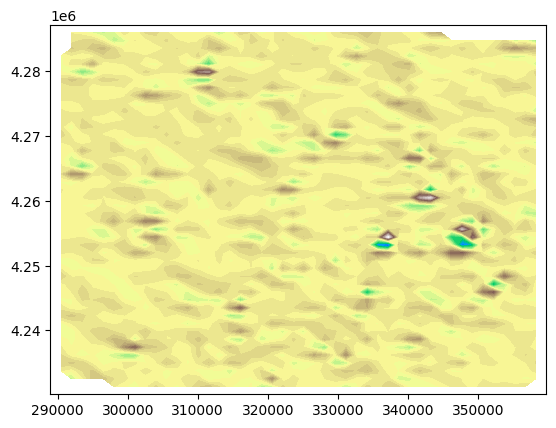

In [38]:
plt.contourf(x_second, y_second, residual, levels=50, cmap='terrain')

## Plotting

In [30]:
print("Dimension of X Coordinate for plotting:", x_second.shape, "\n")
print("Dimension of Y Coordinate for plotting:", y_second.shape, "\n")
print("X Coordinate for residual anomaly:", x_second, "\n")
print("Y Coordinate for residual anomaly:", y_second, "\n")

Dimension of X Coordinate for plotting: (48, 48) 

Dimension of Y Coordinate for plotting: (48, 48) 

X Coordinate for residual anomaly: [[288964.64034082 290472.09598163 291979.55162245 ... 356800.14417755
  358307.59981837 359815.05545918]
 [288964.64034082 290472.09598163 291979.55162245 ... 356800.14417755
  358307.59981837 359815.05545918]
 [288964.64034082 290472.09598163 291979.55162245 ... 356800.14417755
  358307.59981837 359815.05545918]
 ...
 [288964.64034082 290472.09598163 291979.55162245 ... 356800.14417755
  358307.59981837 359815.05545918]
 [288964.64034082 290472.09598163 291979.55162245 ... 356800.14417755
  358307.59981837 359815.05545918]
 [288964.64034082 290472.09598163 291979.55162245 ... 356800.14417755
  358307.59981837 359815.05545918]] 

Y Coordinate for residual anomaly: [[4230152.70055102 4230152.70055102 4230152.70055102 ... 4230152.70055102
  4230152.70055102 4230152.70055102]
 [4231366.251      4231366.251      4231366.251      ... 4231366.251
  4231366.

### (Re-gridded) Complete Bouguer Anomaly

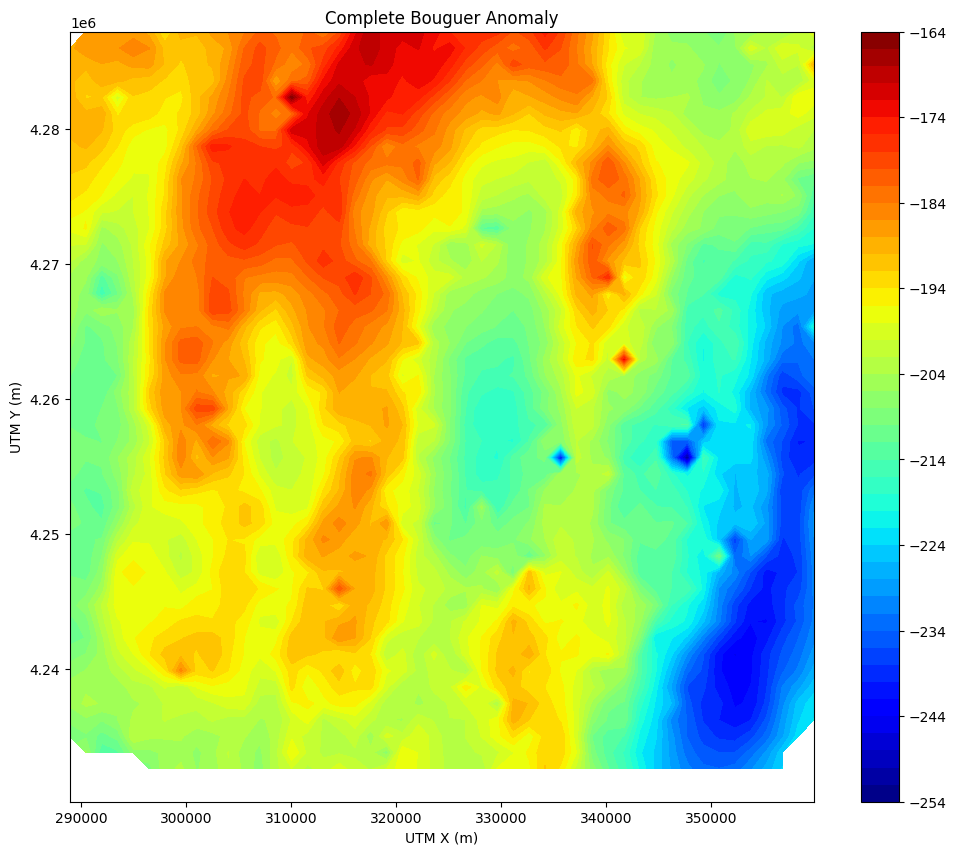

In [31]:
# plot re-gridded CBA contour
fig, ax = plt.subplots(figsize=(12,10))
im = ax.contourf(x_second,y_second,zi_cba,levels=50, cmap="jet")
ax.set_title('Complete Bouguer Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
plt.colorbar(im)

In [49]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=zi_cba, x=x_second, y=y_second,
                                 hovertemplate='UTM X: %{x:.3f} m<br>UTM Y: %{y:.3f} m<br>CBA: %{z:.3f} mgal<extra></extra>')])
fig.update_layout(title='Complete Bouguer Anomaly (3D Surface)',
                  scene = dict(
                      xaxis_title='UTM X (m)',
                      yaxis_title='UTM Y (m)',
                      zaxis_title='CBA'))

fig.show()

### Residual Anomaly

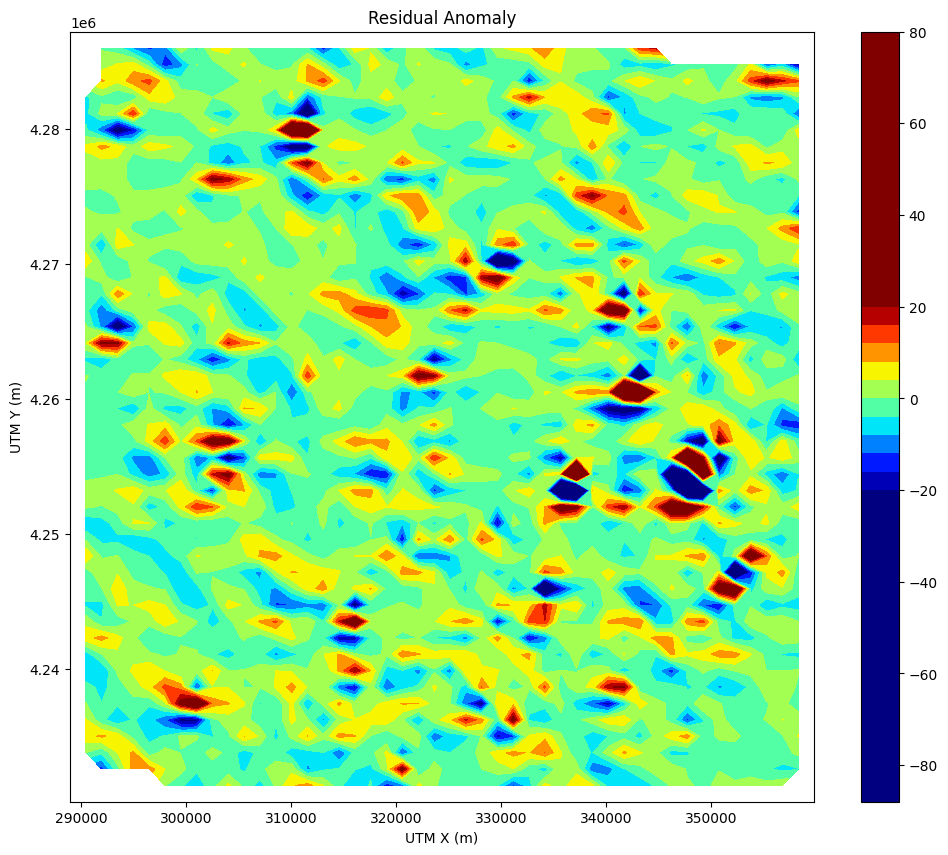

In [32]:
fig, ax = plt.subplots(figsize=(12,10))

# plot residual contours
im = ax.contourf(x_second,y_second,residual,levels=50, cmap="jet",
                 vmin=-20, vmax=20)
ax.set_title('Residual Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
plt.colorbar(im)

In [51]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=residual, x=x_second, y=y_second,
                                 hovertemplate='UTM X: %{x:.3f} m<br>UTM Y: %{y:.3f} m<br>Residual: %{z:.3f} mgal<extra></extra>')])
fig.update_layout(title='Residual Anomaly',
                  scene = dict(
                      xaxis_title='UTM X (m)',
                      yaxis_title='UTM Y (m)',
                      zaxis_title='Residual Anomaly'))

fig.show()

### Regional Anomaly

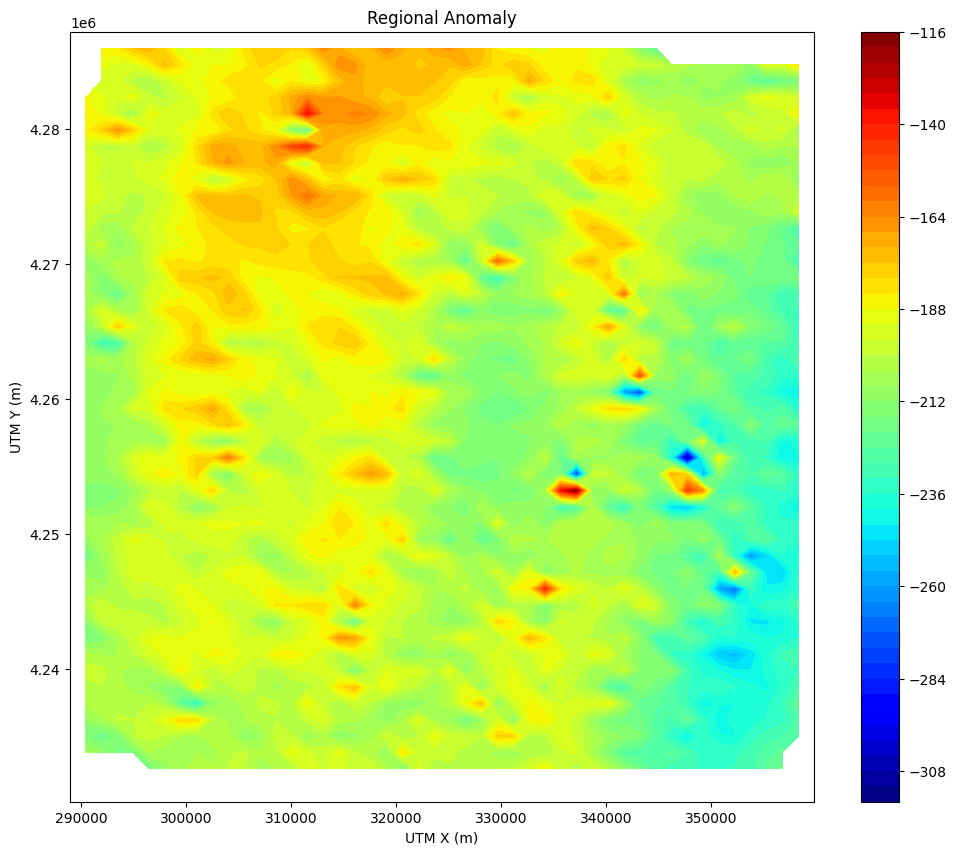

In [33]:
# plot re-gridded regional anomaly contour
fig, ax = plt.subplots(figsize=(12,10))
im = ax.contourf(x_second,y_second,regional,levels=50, cmap="jet")
ax.set_title('Regional Anomaly')
ax.set_xlabel('UTM X (m)'); plt.ylabel('UTM Y (m)')
plt.colorbar(im)

In [53]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(z=regional, x=x_second, y=y_second,
                                 hovertemplate='UTM X: %{x:.3f} m<br>UTM Y: %{y:.3f} m<br>Regional: %{z:.3f} mgal<extra></extra>')])
fig.update_layout(title='Regional Anomaly',
                  scene = dict(
                      xaxis_title='UTM X (m)',
                      yaxis_title='UTM Y (m)',
                      zaxis_title='Regional Anomaly'))

fig.show()

### All anomalies

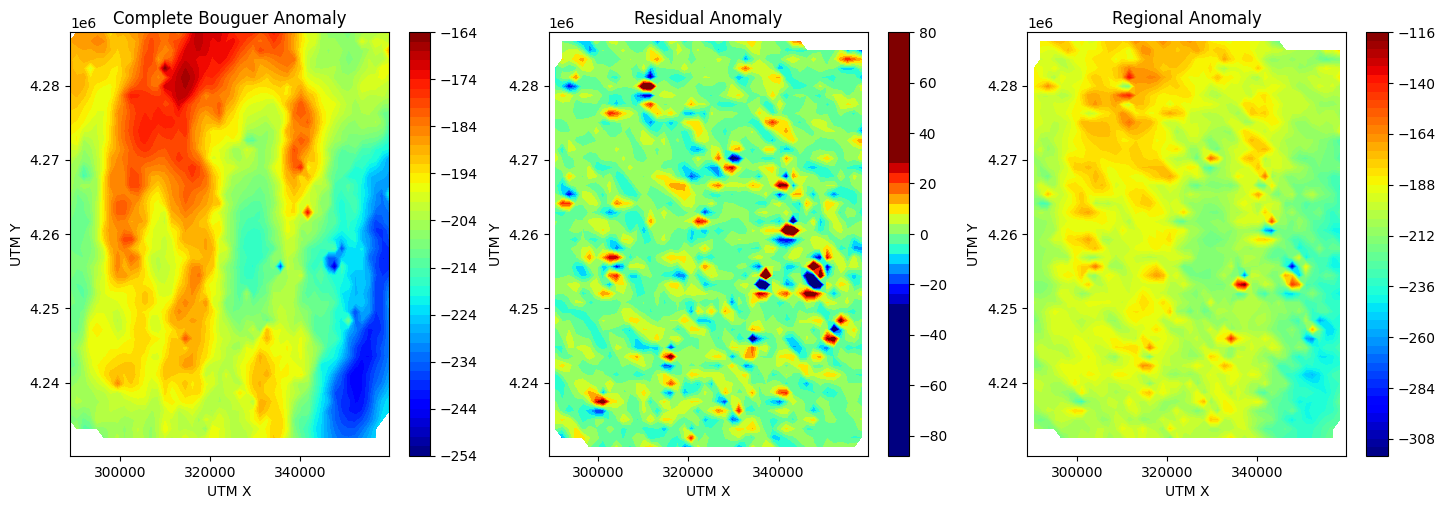

In [44]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(17.5,5.5))
axs = axs.flatten()

im = axs[0].contourf(x_second,y_second,zi_cba,levels=50, cmap="jet")
axs[0].set_title('Complete Bouguer Anomaly')
axs[0].set_xlabel('UTM X'); axs[0].set_ylabel('UTM Y')
fig.colorbar(im, ax=axs[0])


im = axs[1].contourf(x_second,y_second,residual,levels=50, cmap="jet", vmin=-30, vmax=30)
axs[1].set_title('Residual Anomaly')
axs[1].set_xlabel('UTM X'); axs[1].set_ylabel('UTM Y')
fig.colorbar(im, ax=axs[1])

im = axs[2].contourf(x_second,y_second,regional,levels=50, cmap="jet")
axs[2].set_title('Regional Anomaly')
axs[2].set_xlabel('UTM X'); axs[2].set_ylabel('UTM Y')
fig.colorbar(im, ax=axs[2])

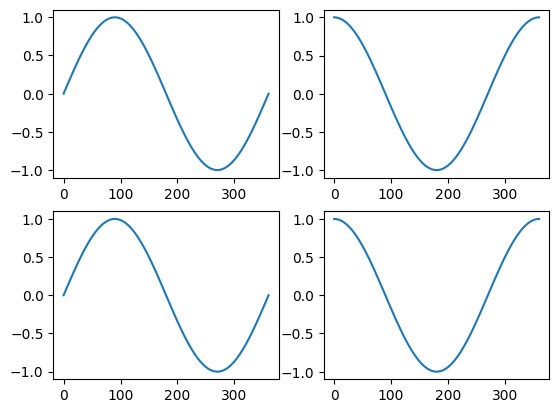

In [43]:
deg = np.linspace(0,360,100)
rad = np.deg2rad(deg)

f1 = np.sin(rad)
f2 = np.cos(rad)

plt.subplot(2,2,1)
plt.plot(deg, f1)

plt.subplot(2,2,2)
plt.plot(deg, f2)

plt.subplot(2,2,3)
plt.plot(deg, f1)

plt.subplot(2,2,4)
plt.plot(deg, f2)

## Histogram

Text(0.5, 0, 'Residual anomaly (mgal/km$^2$)')

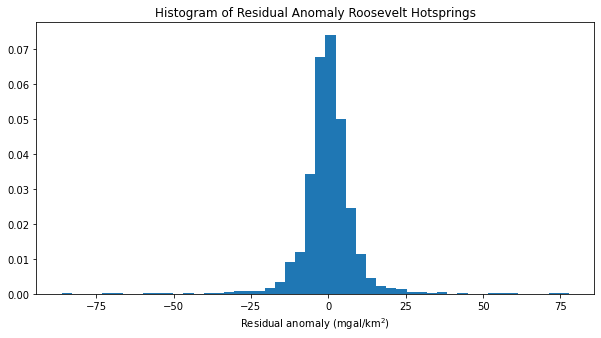

In [ ]:
residuals = np.reshape(residual, (1, 2304))
residuals = residuals[~np.isnan(residuals)] # delete NaN values

plt.figure(figsize=(10,5))
plt.hist(residuals, bins=50, density=True)
plt.title('Histogram of Residual Anomaly Roosevelt Hotsprings')
plt.xlabel('Residual anomaly (mgal/km$^2$)')